# Week 7
# Advanced Plotting

Today we will study the `seaborn` library. Seaborn is a powerful visualization library that provides a high-level interface to Matplotlib.

On Seaborn’s official website, they state:

>If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

In [5]:
# !pip install update seaborn
!pip install seaborn==0.10.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.__version__

'0.10.1'

## 1. Scatter Plot
`sns.scatterplot()`
Parameters:
- x, y: columns for x and y axes.
- data: data frame
- hue: variable that will produce points with different colors
- marker: how to draw the markers for different variables.
- alpha: opacity
- legend: "auto", "brief", "full", or False

In [6]:
# Seaborn comes with several educational datasets
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Text(0.5, 1.0, 'Penguins')

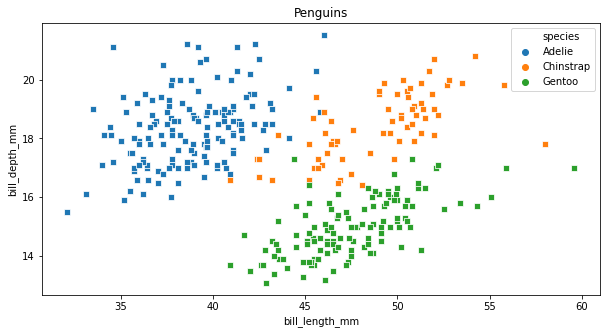

In [19]:
plt.figure(figsize=(10, 5))
# sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

# sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",
#                 hue="species")

# sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",
#                 alpha=0.5)

# sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",
#                 hue="species",
#                 legend=False)

sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",
                hue="species",
                marker="s")
plt.title("Penguins")

## 2. Line Chart
`sns.lineplot()`
- x, y
- data
- hue

In [20]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [21]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [23]:
may_flights = flights[flights['month'] == 'May']
may_flights

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229
64,1954,May,234
76,1955,May,270
88,1956,May,318
100,1957,May,355
112,1958,May,363


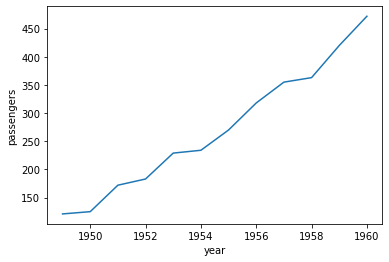

In [24]:
sns.lineplot(data=may_flights, x="year", y="passengers")

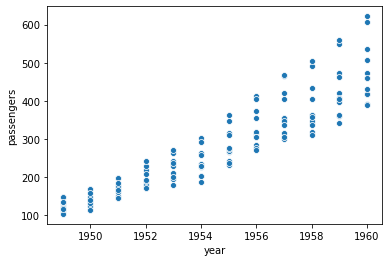

In [26]:
sns.scatterplot(data=flights, x="year", y="passengers")

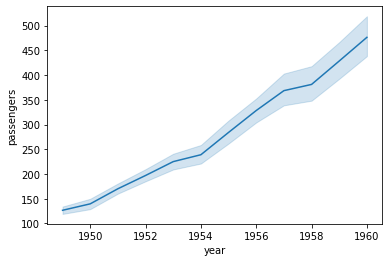

In [25]:
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year) 
# to show the mean and 95% confidence interval:
sns.lineplot(data=flights, x="year", y="passengers")

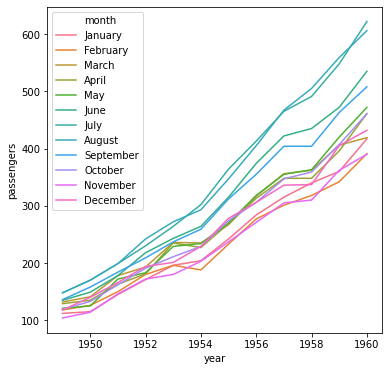

In [27]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

## 3. Histogram
`sns.distplot`
- bins

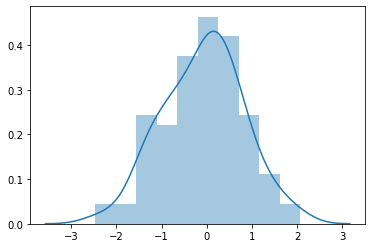

In [31]:
x = np.random.randn(100)
ax = sns.distplot(x, bins=10)

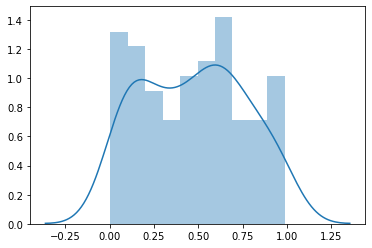

In [42]:
# np.random.seed(0) # by fixing the random seed, random number generator will return
                  # the same sequence of values every time.
                  # It cancels the purpose of random number generator, so only use
                  # it for reproducibility.
x2 = np.random.rand(100)
sns.distplot(x2, bins=10)

## 4. Bar Plot
- `sns.countplot`
- `sns.barplot`

In [43]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [45]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

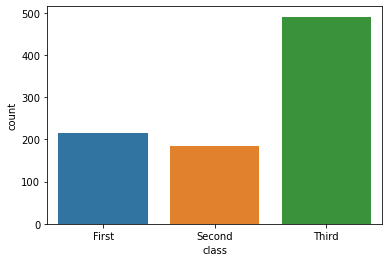

In [46]:
sns.countplot(x="class", data=titanic)

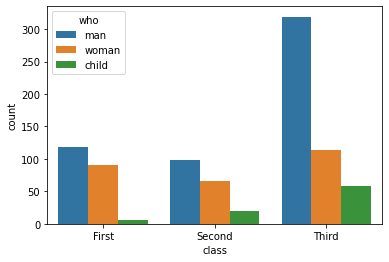

In [47]:
sns.countplot(x="class", hue="who", data=titanic)

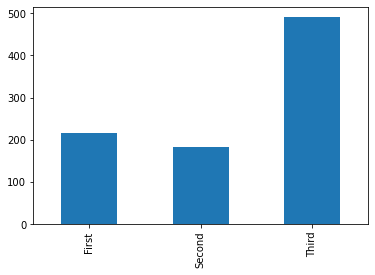

In [49]:
# Use basic Matplotlib Function to create the bar plot
titanic['class'].value_counts().sort_index().plot.bar()

In [50]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
# There are more than one value for each day
tips[tips['day'] == "Sun"]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


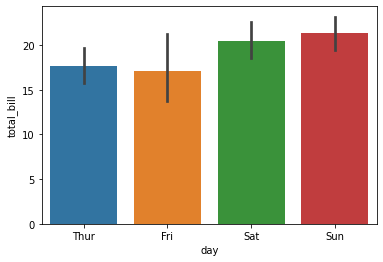

In [51]:
sns.barplot(x="day", y="total_bill", data=tips)

## 5. Box Plot

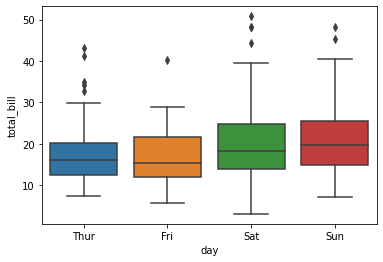

In [53]:
sns.boxplot(x="day", y="total_bill", data=tips)

Use `swarmplot()` to show the datapoints on top of the boxes:

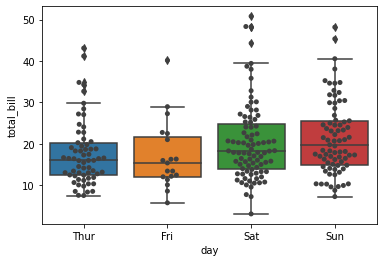

In [56]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

## 6. Regplot()
Plot data and a linear regression model fit.

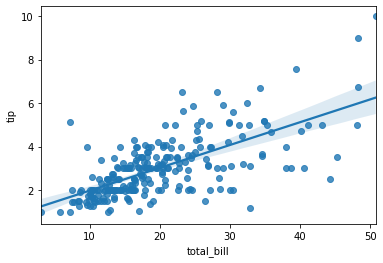

In [58]:
sns.regplot(x="total_bill", y="tip", data=tips)

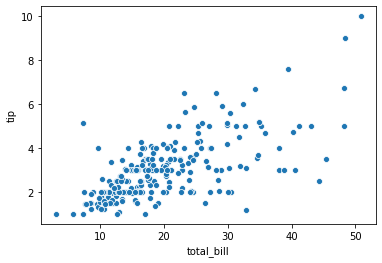

In [57]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

In [63]:
tips_subset = tips.loc[:10]
tips_subset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


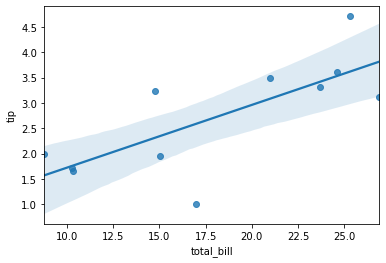

In [64]:
sns.regplot(data=tips_subset, x="total_bill", y="tip")

## 7. Catplot()

In [65]:
exercise = sns.load_dataset("exercise")
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


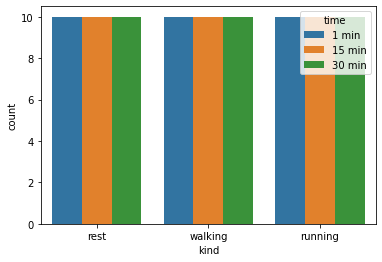

In [69]:
sns.countplot(data=exercise, x="kind", hue="time")

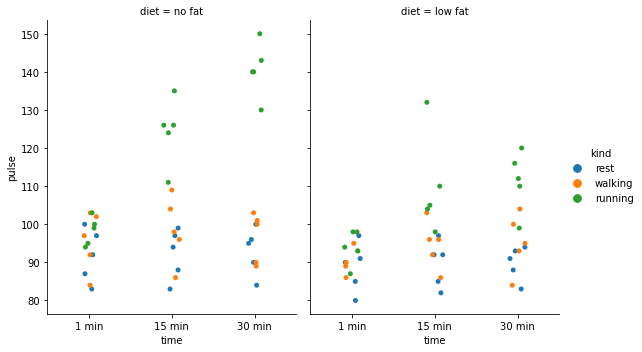

In [70]:
sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise,
                height=5, aspect=.8)

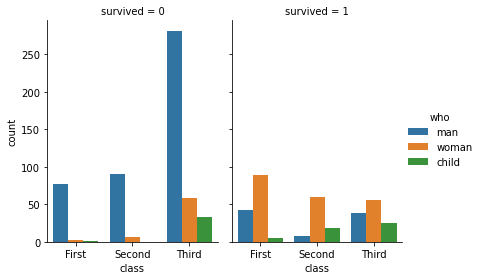

In [71]:
sns.catplot(x="class", hue="who", col="survived",
                data=titanic, kind="count",
                height=4, aspect=.7);

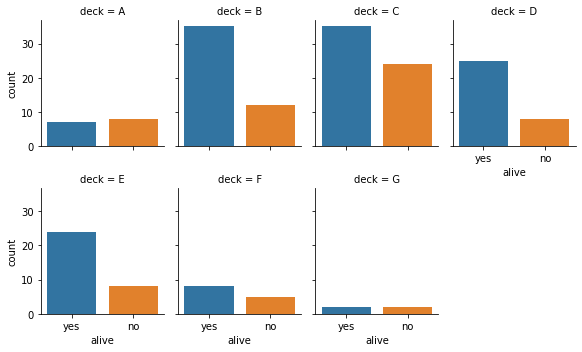

In [72]:
sns.catplot(x="alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=2.5, aspect=.8)